# SML 312 - Project 2 - Classification

Pranav Avva

In [227]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set()
%matplotlib inline

## Problem 1 - Comparing Classification Models

### Part A

In [228]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the dataset
data = load_breast_cancer()

# Create dataframe with labels and features from dataset
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Create a 80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], train_size=0.8)
df_train = pd.DataFrame(X_train, columns=X_train.columns)
df_test = pd.DataFrame(X_test, columns=X_test.columns)
df_train['target'] = y_train
df_test['target'] = y_test

### Part B

In [229]:
df_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
536,14.270,22.55,93.77,629.8,0.10380,0.11540,0.146300,0.061390,0.1926,0.05982,...,34.27,104.30,728.3,0.13800,0.27330,0.423400,0.13620,0.2698,0.08351,0
350,11.660,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.011620,0.1671,0.05731,...,19.74,83.61,542.5,0.09958,0.06476,0.030460,0.04262,0.2731,0.06825,1
77,18.050,16.15,120.20,1006.0,0.10650,0.21460,0.168400,0.108000,0.2152,0.06673,...,18.91,150.10,1610.0,0.14780,0.56340,0.378600,0.21020,0.3751,0.11080,0
431,12.400,17.68,81.47,467.8,0.10540,0.13160,0.077410,0.027990,0.1811,0.07102,...,22.91,89.61,515.8,0.14500,0.26290,0.240300,0.07370,0.2556,0.09359,1
320,10.250,16.18,66.52,324.2,0.10610,0.11110,0.067260,0.039650,0.1743,0.07279,...,20.61,71.53,390.4,0.14020,0.23600,0.189800,0.09744,0.2608,0.09702,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,12.030,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,0.1382,0.06070,...,22.25,82.74,523.4,0.10130,0.07390,0.007732,0.02796,0.2171,0.07037,1
334,12.300,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,0.05945,...,28.46,84.53,544.3,0.12220,0.09052,0.036190,0.03983,0.2554,0.07207,1
433,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.159400,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.13900,0.34630,0.391200,0.17080,0.3007,0.08314,0
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.112600,0.064630,0.1669,0.06544,...,30.80,113.90,869.3,0.16130,0.35680,0.406900,0.18270,0.3179,0.10550,0


Text(0, 0.5, 'Count')

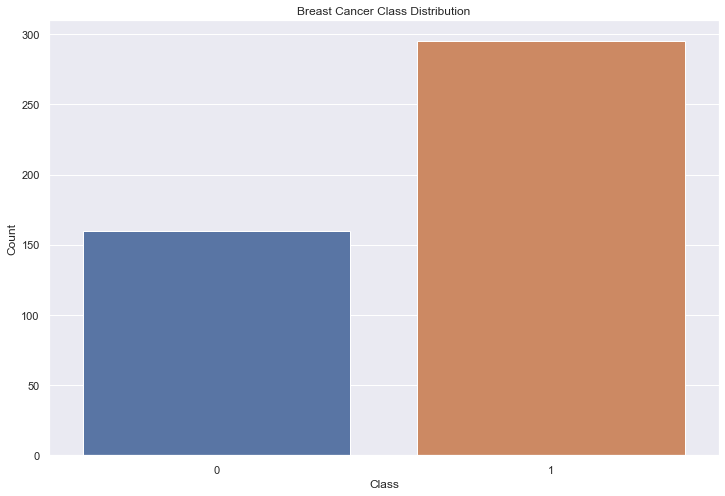

In [230]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x=df_train['target'], ax=ax)
ax.set_title('Breast Cancer Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Count')

The above bar chart shows the number of positive labels to negative labels in the train split. It appears there are more positive labels than negative overall. This is confirmed by re-splitting the data multiple times.

Text(48.45312499999999, 0.5, 'Feature')

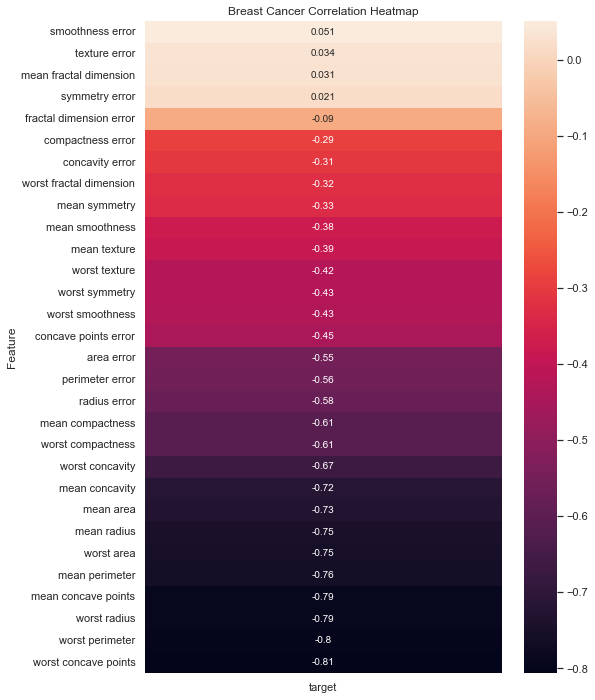

In [231]:
fig, ax = plt.subplots(figsize=(8, 12))
sns.heatmap(df_train.corr()[['target']].sort_values(by='target', ascending=False).drop('target', axis=0), annot=True, ax=ax)
ax.set_title('Breast Cancer Correlation Heatmap')
ax.set_ylabel('Feature')

The above heatmap shows the correlation of each feature with the target label. Only four features are positively correlated with the target label. The remaining features are negatively correlated. The median feature correlation is -0.49, though the feature correlation ranges from 0.02 to -0.8. It appears that the strongest-correlated features are mean and worst measurements, as opposed to errors in those measurements. A notable exception to this is that symmetry, smoothness, and texture measurements are more weakly correlated than the errors of other measurements. 

<AxesSubplot:>

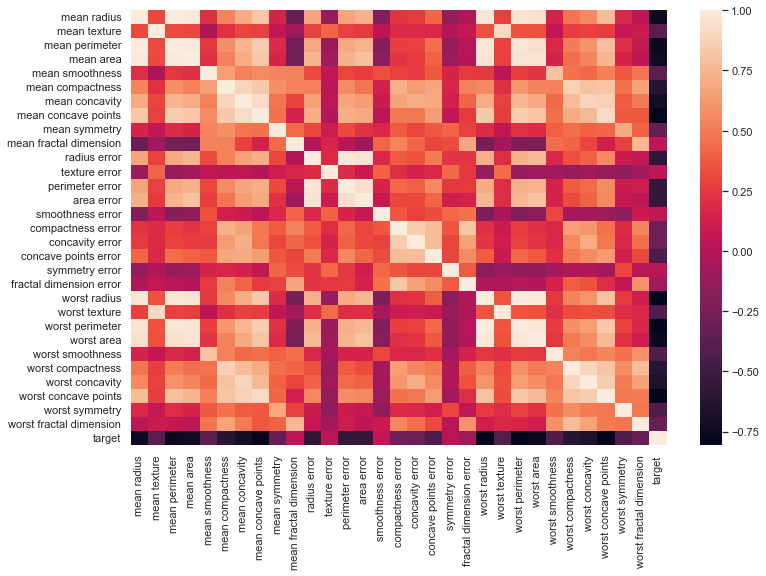

In [232]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_train.corr())

The above plot shows the correlation matrix heatmap. Upon visual inspection, there are a couple distinct patterns in the correlation matrix heatmap. The features can be seperated into groups based on how they correlate with the other features. That is, each of the rows in the below groups have nearly identical colorings:

* Group 1 (each of the members in this group have nearly the same row coloring):
  * Mean radius
  * Mean perimeter
  * Mean area
  * Worst radius
  * Worst perimeter
  * Worst area
* Group 2 (error features for Group 1, similar to each other but not as similar as the features of Group 1):
  * Radius error
  * Perimeter error
  * Area error
* Group 3 (each of the members in this group have nearly the same row coloring):
  * Mean compactness
  * Mean concavity
  * Mean concavity points
  * Worst compactness
  * Worst concavity
  * Worst concavity points
* Group 4 (mirrors the behavior of Group 2, but with the features of Group 3):
  * Compactness error
  * Concavity error
  * Concavity points error

All other measurements can't be grouped with any other measurements. However, the `mean` and `worst` rows of a measurement have the same correlation coloring.

A possible explanation for why these patterns exist is because the measurements represent values that can be derived from each other. Taking Group 1 as an example, the radius, perimeter, and area of a circle can all be derived from each other; knowing any one measurement allows us to calculate the other two. This linear dependence is mirrored in other groups. With Groups 2 and 4, which are error terms, the linear dependence is less clear, because these features represent errors in empirical measurements, which is dependent more on the instruments used to take the measurements than the features themselves.

### Part C

In [233]:
from sklearn.neighbors import KNeighborsClassifier

# Using default params
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Text(0.5, 30.453125, 'Predicted Class')

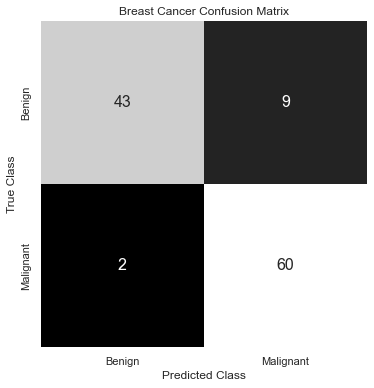

In [234]:
from sklearn.metrics import confusion_matrix

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, fmt='d', cmap='Greys_r', cbar=False,
            square=True, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], annot_kws={'size': 16}, )
ax.set_title('Breast Cancer Confusion Matrix')
ax.set_ylabel('True Class')
ax.set_xlabel('Predicted Class')

### Part D

In [235]:
from sklearn.metrics import classification_report, f1_score

# print the classification report
print(classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        52
           1       0.87      0.97      0.92        62

    accuracy                           0.90       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.90      0.90       114

F1 Score: 0.9160305343511451


I belive that the best way to measure the "goodness" of the model is to look at the F1 score of the model against the testing data. This is because the F1 score is the harmonic mean of the precision and recall scores. The F1 score penalizes the model for having a low precision or recall score due to the nature of the harmonic mean. This also means that the F1 score can account for the fact that the underlying data may be skewed in some way (as opposed to the accuracy score). For example, if there were far more malignant tumors than benign tumors, a model which simply predicted that all tumors were malignant would have a high accuracy score but a low F1 score.

### Part E

#### Model 1 - K-Nearest Neighbors

The model in 1C (above) used KNN with the default parameters of K=5.

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        52
           1       0.86      0.92      0.89        62

    accuracy                           0.88       114
   macro avg       0.88      0.87      0.88       114
weighted avg       0.88      0.88      0.88       114

F1 Score: 0.890625


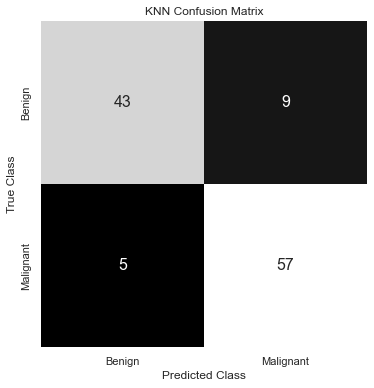

In [236]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, ax=ax, fmt='d', cmap='Greys_r', cbar=False,
            square=True, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], annot_kws={'size': 16}, )
ax.set_title('KNN Confusion Matrix')
ax.set_ylabel('True Class')
ax.set_xlabel('Predicted Class')

# print the classification report
print(classification_report(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))

The model seems to generally perform better with K=4 than K=5.

#### Model 2 - Naive Bayes

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        62

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

F1 Score: 1.0


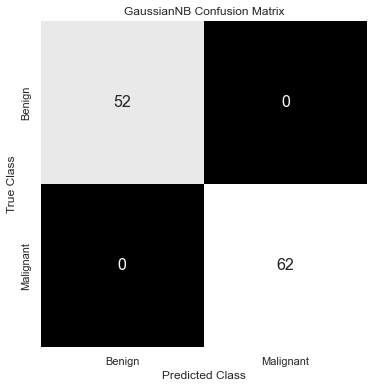

In [237]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, ax=ax, fmt='d', cmap='Greys_r', cbar=False,
            square=True, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], annot_kws={'size': 16}, )
ax.set_title('GaussianNB Confusion Matrix')
ax.set_ylabel('True Class')
ax.set_xlabel('Predicted Class')

# print the classification report
print(classification_report(y_test, y_pred_gnb))
print("F1 Score:", f1_score(y_test, y_pred_gnb))

The Gaussian Naive Bayes has a perfect performance on the testing data, even after the train/test data was resplit multiple times!

#### Model 3 - Logistic Regression

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.97      1.00      0.98        62

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

F1 Score: 0.9841269841269841


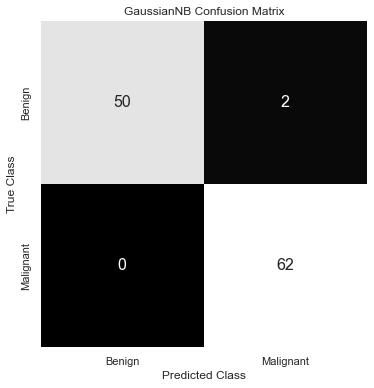

In [238]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=10000, n_jobs=-1)
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, ax=ax, fmt='d', cmap='Greys_r', cbar=False,
            square=True, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], annot_kws={'size': 16}, )
ax.set_title('GaussianNB Confusion Matrix')
ax.set_ylabel('True Class')
ax.set_xlabel('Predicted Class')

# print the classification report
print(classification_report(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))

Logistic Regression with default parameters (save for increasing the max iteration count) gives excellent performce. The F1 score is 0.98 to 0.99, which is much higher than the F1 score of KNN. However, it does not have perfect performance, unlike GaussianNB.

#### Model 4 - Support Vector Machines

#### Model 5 - Decision Trees

#### Model 6 - Random Forests

### Part F

### Part G

### Part H

## Problem 2 - Explaining Your Model

### Part A

### Part B

### Part C

## Problem 3 - Varying the Decision Threshold

### Part A

### Part B

### Part C

## Honor Code Statement

I solemnly swear that I'm up to no good.